1. implement linear SVM algorithm on final boards classification and single label classification.
2. repeat for KNN and multilayer perceptron.
3. write a single program that outputs accuracy and confusion matrices for both datasets and for all the classifiers.

In [4]:
# import libraries
import pandas as pd
import numpy as np
import sklearn
# dataset paths
final_txt_path = "./datasets/tictac_final.txt"
multi_txt_path = "./datasets/tictac_multi.txt"
single_txt_path = "./datasets/tictac_single.txt"

In [5]:
from sklearn.model_selection import train_test_split

def get_test_train(path):
    data_set = open(path,"r")
    # build x and y 
    X = []
    y = []
    for line in data_set:
        temp = line.rstrip().split(" ")
        X.append(temp[:9])
        if len(temp) == 10:
            y.append(temp[-1])
        else:
            y.append(temp[-9:])
    # split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True)
    return X_train, X_test, y_train, y_test

Classifier Functions

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# create function to get accuracy and plot confusion matrix
def get_stats(actual, pred, title, cmap=plt.cm.gray_r):
    accuracy = sklearn.metrics.accuracy_score(actual, pred, normalize=True)
    
    a = pd.Series(actual, name='Actual')
    p = pd.Series(pred, name='Predicted')
    df_confusion = pd.crosstab(a, p)
    
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    title = title + f" (Accuracy: {round(accuracy, 4)})"
    plt.title(title)
    plt.show()

In [7]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

def clf_pipeline(model, path, title, transform_X=True):
    # get testing data
    X_train, X_test, y_train, y_test = get_test_train(path)
    if transform_X:
        X_train = np.array(X_train, dtype=np.float64)
        X_test = np.array(X_test, dtype=np.float64)
    # get cross-validation score
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    score = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"Cross Validation Scores:\n{score}")
    # fit model
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    # print out stats
    get_stats(y_test, y_hat, title)

# Classification: Linear SVM - Final Board State and Optimal Single Move

In [8]:
from sklearn import svm, metrics
clf = svm.SVC(C=1)

Cross Validation Scores:
[0.98148148 0.98611111 0.98611111 0.98148148 0.98148148 0.97685185
 0.97685185 0.97685185 0.98148148 0.98611111]


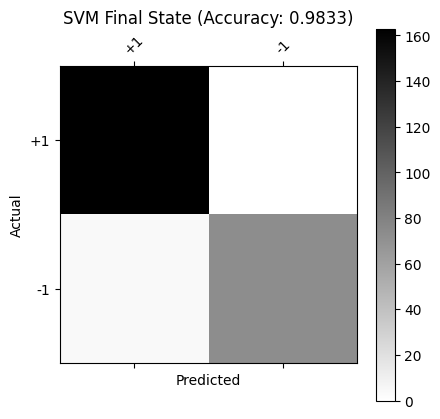

In [9]:
clf_pipeline(clf, "./datasets/tictac_final.txt", "SVM Final State")


In [10]:
from joblib import dump, load
dump(clf, 'svm_clf_final.joblib')

['svm_clf_final.joblib']

In [11]:
# build model
clf = svm.SVC(C=1)

Cross Validation Scores:
[0.78629579 0.79647218 0.81411126 0.79850746 0.80393487 0.79579376
 0.79240163 0.77408412 0.79579376 0.78358209]


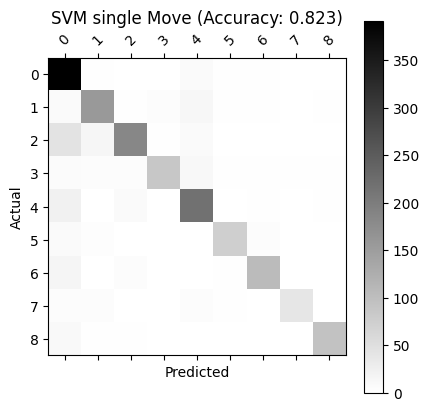

In [12]:
clf_pipeline(clf, "./datasets/tictac_single.txt", "SVM single Move")


In [13]:
dump(clf, 'svm_clf_single.joblib')

['svm_clf_single.joblib']

# Classification: KNN - Final Board State and Optimal Single Move

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

Cross Validation Scores:
[0.98611111 1.         0.99537037 0.99537037 1.         1.
 1.         0.99074074 0.99537037 0.98611111]


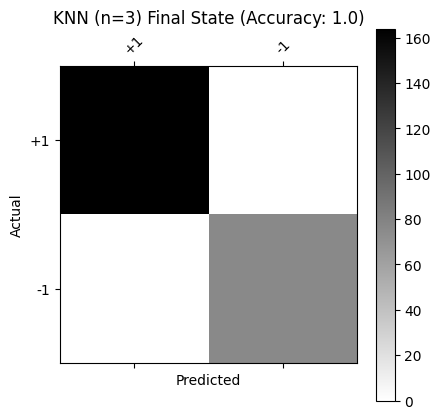

In [15]:
clf_pipeline(knn, "./datasets/tictac_final.txt", "KNN (n=3) Final State")

In [16]:
dump(knn, 'knn_clf_final.joblib')

['knn_clf_final.joblib']

In [17]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

Cross Validation Scores:
[0.78154681 0.78561737 0.78086839 0.77679783 0.7761194  0.77408412
 0.78154681 0.78290366 0.79036635 0.7761194 ]


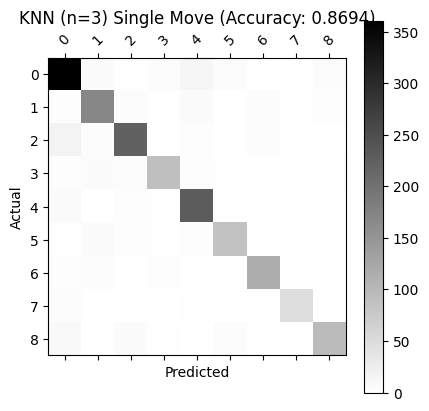

In [18]:
clf_pipeline(knn, "./datasets/tictac_single.txt", "KNN (n=3) Single Move", transform_X=True)

In [19]:
dump(knn, 'knn_clf_single.joblib')

['knn_clf_single.joblib']

# Classification: MLP - Final Board State and Optimal Single Move

In [20]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=600)

Cross Validation Scores:
[0.99074074 0.99074074 0.98148148 0.98148148 0.99537037 0.99074074
 0.99537037 0.98611111 0.97222222 0.98148148]


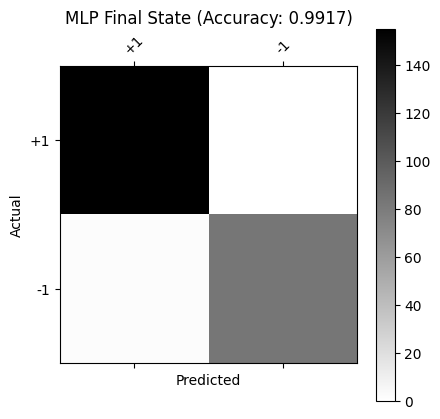

In [21]:
clf_pipeline(mlp, "./datasets/tictac_final.txt", "MLP Final State", transform_X=True)

In [22]:
dump(mlp, 'mlp_clf_final.joblib')

['mlp_clf_final.joblib']

In [23]:
mlp = MLPClassifier(random_state=1, max_iter=2000)

Cross Validation Scores:
[0.88670285 0.88738128 0.88738128 0.88941655 0.89348711 0.89687924
 0.89280868 0.90162822 0.89145183 0.89755767]


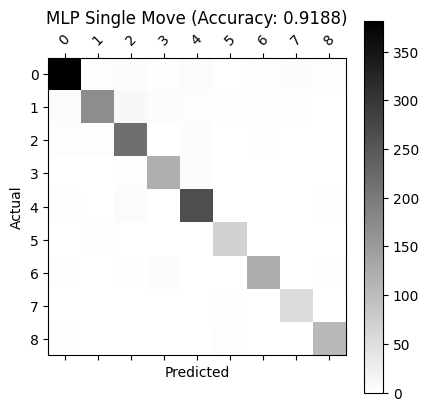

In [24]:
clf_pipeline(mlp, "./datasets/tictac_single.txt", "MLP Single Move", transform_X=True)

In [25]:
dump(mlp, 'mlp_clf_single.joblib')

['mlp_clf_single.joblib']

# Regression Functions

In [26]:
from sklearn.metrics import root_mean_squared_error

def get_reg_stats(actual, pred):
    accuracy = sklearn.metrics.accuracy_score(actual, pred, normalize=True)
    print(f"Accuracy:\n{accuracy}")
    rmse = root_mean_squared_error(actual, pred)
    print(f"RMSE:\n{round(rmse,4)}")

In [27]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

def reg_pipeline(model, path, transform=True):
    # get testing data
    X_train, X_test, y_train, y_test = get_test_train(path)
    if transform:
        X_train = np.array(X_train, dtype=np.float64)
        X_test = np.array(X_test, dtype=np.float64)
        y_train = np.array(y_train, dtype=np.float64)
        y_test = np.array(y_test, dtype=np.float64)
    # get cross-validation score
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
    score = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"Cross Validation Scores:\n{score}")
    # fit model
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    for arr in y_hat:
        for i in range(len(arr)):
            if arr[i] >= 0.5:
                arr[i] = 1
            else:
                arr[i] = 0
    # print out stats
    get_reg_stats(y_test, y_hat)

# Regression: KNN - Optimal Multi Move

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=2,weights="distance")

In [29]:
reg_pipeline(knn_reg, "./datasets/tictac_multi.txt")

Cross Validation Scores:
[0.58152083 0.57473417 0.5868848  0.59407357 0.62049996 0.56871236
 0.57789907 0.5834713  0.56514066 0.58869901]
Accuracy:
0.6929181929181929
RMSE:
0.2838


In [30]:
from joblib import dump, load
dump(knn_reg, 'knn_reg.joblib')

['knn_reg.joblib']

# Regression: Linear - Optimal Multi Move

In [31]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
l_reg = MultiOutputRegressor(LinearRegression())

In [32]:
reg_pipeline(l_reg, "./datasets/tictac_multi.txt")

Cross Validation Scores:
[ 0.00083339 -0.00059686  0.00146458  0.00114178  0.00142247  0.00174186
 -0.0020133   0.00104868  0.00135918  0.00208644]
Accuracy:
0.0
RMSE:
0.464


In [33]:
from joblib import dump, load
dump(l_reg, 'l_reg.joblib')

['l_reg.joblib']

# Regression: MLP - Optimal Multi Move

In [34]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(400,400), max_iter=1000)

In [35]:
reg_pipeline(mlp_reg, "./datasets/tictac_multi.txt")

Cross Validation Scores:
[0.71194269 0.74647361 0.71590859 0.70629317 0.70604124 0.71245524
 0.70571275 0.71811679 0.73385716 0.69741499]
Accuracy:
0.8363858363858364
RMSE:
0.1673


In [36]:
from joblib import dump, load
dump(mlp_reg, 'mlp_reg.joblib')

['mlp_reg.joblib']